<a href="https://colab.research.google.com/github/Kylian07/PyTorch/blob/main/simple_neuralnetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [55]:
#Create a Model Class the inherits the nn.Module
class Model(nn.Module):
  #Input Layer(4 feature of the flower) -->
  #Hidden Layer1(number of neurons) -->
  #Hidden Layer2(number of neuron) -->
  #Output(3 classes of iris)
  def __init__(self,in_features=4, h1=8, h2=9, out_features=3):
    super().__init__() #instantiate the nn.Module
    self.fc1=nn.Linear(in_features,h1)
    self.fc2=nn.Linear(h1,h2)
    self.out=nn.Linear(h2,out_features)

  def forward(self,x):
    x=F.relu(self.fc1(x))
    x=F.relu(self.fc2(x))
    x=self.out(x)

    return x

In [56]:
#Pick a manual seed for randomization
torch.manual_seed(41)
#Create a instance of model
model=Model()

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [58]:
url='https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df=pd.read_csv(url)

In [59]:
my_df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [60]:
#Change last colums from strings to integer
my_df['variety']=my_df['variety'].replace({'Setosa':0.0,'Versicolor':1.0,'Virginica':2.0})
my_df

<ipython-input-60-4e3f9dc9f60e>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['variety']=my_df['variety'].replace({'Setosa':0.0,'Versicolor':1.0,'Virginica':2.0})


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [61]:
#Train test split
X=my_df.drop('variety',axis=1)
y=my_df['variety']

In [62]:
#Convet to numpy arrays
X= X.values
y=y.values

In [63]:
#Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)


In [64]:
#Convert X  features to Float Tensors
X_train=torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)

In [65]:
#Convert  y features to long Tensors
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)

In [66]:
#Set the criterion of model to measure the error , how far the predictions ar from the data
criterion=nn.CrossEntropyLoss()
#Choose Adam Optimizer, lr=learning_rate(if erroe doesn't get down after a bunch of iterations(epochs), lower out learning rate)
optimizer=torch.optim.Adam(model.parameters(), lr=0.01)

In [67]:
#Train our model
#Epoch? 1 run through all the training data in our network
epochs=100
losses=[]
for i in range(epochs):
  #Go Forward and get a prediction
  y_pred=model.forward(X_train)#Get predicted results

  #Measure the loss/error, gonna be high at first
  loss=criterion(y_pred,y_train)#predicted value v/s actual values

  #Keep track of our losses
  losses.append(loss.detach().numpy())

  #print every 10 epoch
  if i%10 == 0:
    print(f'Epoch {i} and Loss {loss}')

  #do backpropagation: take the error rates of the forward propagation and feed it back through the networks to finetune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch 0 and Loss 1.1209208965301514
Epoch 10 and Loss 1.0023877620697021
Epoch 20 and Loss 0.8055697083473206
Epoch 30 and Loss 0.5908047556877136
Epoch 40 and Loss 0.415547251701355
Epoch 50 and Loss 0.288332998752594
Epoch 60 and Loss 0.20293138921260834
Epoch 70 and Loss 0.14501789212226868
Epoch 80 and Loss 0.1096387729048729
Epoch 90 and Loss 0.08943477272987366


Text(0.5, 0, 'Epoch')

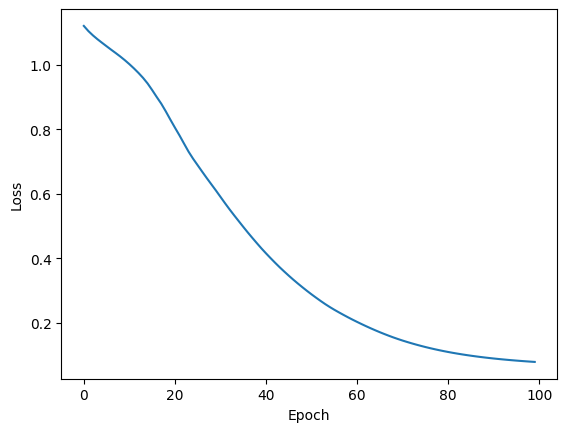

In [68]:
#Graph
plt.plot(range(epochs),losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [76]:
#Evaluate our model on our test dataset
with torch.no_grad():#Basically turn of back propagation
  y_eval=model.forward(X_test) #X_test are features from our test set, y_eval will be predictions
  loss=criterion(y_eval,y_test)#Find loss/error


In [77]:
loss

tensor(0.0467)

In [83]:
correct=0
with torch.no_grad():
  for i,data in enumerate(X_test):
    y_val=model.forward(data)

    if y_test[i]==0:
      x='Setosa'
    elif y_test[i]==1:
      x='Versicolor'
    else:
      x='Virginica'

    if y_val.argmax().item()==0:
      y='Setosa'
    elif y_val.argmax().item()==1:
      y='Versicolor'
    else:
      y='Virginica'

    #tell us the type flower the network think it is
    print(f'{i+1}.) {str(y_val)} \t actual: {x} \t predicted: {y}')

    #Correct or not
    if y_val.argmax().item() == y_test[i]:
      correct+=1
  print(f'\nWe got {correct} correct')

1.) tensor([-7.1381,  3.7582,  9.7989]) 	 actual: Virginica 	 predicted: Virginica
2.) tensor([-3.0093,  5.0737,  1.0094]) 	 actual: Versicolor 	 predicted: Versicolor
3.) tensor([ 5.5147, -2.8355, -3.3463]) 	 actual: Setosa 	 predicted: Setosa
4.) tensor([-7.3746,  4.6435,  9.2348]) 	 actual: Virginica 	 predicted: Virginica
5.) tensor([ 4.5401, -1.9830, -2.9013]) 	 actual: Setosa 	 predicted: Setosa
6.) tensor([-8.1250,  3.7479, 11.5783]) 	 actual: Virginica 	 predicted: Virginica
7.) tensor([ 4.7224, -2.1421, -2.9847]) 	 actual: Setosa 	 predicted: Setosa
8.) tensor([-4.2018,  5.7685,  2.3130]) 	 actual: Versicolor 	 predicted: Versicolor
9.) tensor([-4.4177,  5.6610,  2.8182]) 	 actual: Versicolor 	 predicted: Versicolor
10.) tensor([-3.0398,  5.1304,  1.0204]) 	 actual: Versicolor 	 predicted: Versicolor
11.) tensor([-5.8436,  4.1701,  7.0733]) 	 actual: Virginica 	 predicted: Virginica
12.) tensor([-3.8300,  5.7125,  1.7194]) 	 actual: Versicolor 	 predicted: Versicolor
13.) tens

In [84]:
new_iris= torch.tensor([4.7, 3.2, 1.3, 0.2])

In [85]:
with torch.no_grad():
  print(model(new_iris))

tensor([ 4.5561, -2.0228, -2.8919])


In [86]:
newer_iris=torch.tensor([5.9,3.0,5.1,1.8])

In [87]:
with torch.no_grad():
  print(model(newer_iris))

tensor([-5.6092,  4.3847,  6.3963])


In [89]:
#Save our NN model
torch.save(model.state_dict(),'simpleneuralmodel(iris).pt')

In [90]:
#Load our model
new_model= Model()
new_model.load_state_dict(torch.load('simpleneuralmodel(iris).pt'))

<ipython-input-90-74290c3c047b>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  new_model.load_state_dict(torch.load('simpleneuralmodel(iris).pt'))


<All keys matched successfully>

In [91]:
#Make sure it is loaded correctly
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)